In [546]:
import pandas as pd

In [547]:
df = pd.read_excel("Arvand.xlsx")


# 

# DATA PREPROCESSING - меняю на нужный мне формат, создаю новую переменную и убираю ненужное.

In [548]:
df['FamilySize'] = pd.to_numeric(df['FamilySize'], errors='coerce')
df['FamilySize'].unique()

array([ 4.,  6.,  5.,  3.,  7.,  2., nan,  1.,  8.])

In [549]:
df['Birthday'] = pd.to_datetime(df['Birthday'], errors='coerce')

In [550]:
df['Birthday'] = df['Birthday'].dt.year

In [551]:
df = df.drop('Year', axis=1)

In [552]:
df['Дата выдачи'] = df['Дата выдачи'].dt.year

In [553]:
df['Age'] = df['Дата выдачи'] - df['Birthday']

In [554]:
df = df.drop('Birthday', axis=1)
df = df.drop('Дата выдачи', axis=1)

# ENCODING PROCESS - кодирую категориальные данные, так чтобы было ясно какое значение под каким номером. Перевожу валюту на исключительно сомони.

In [555]:
from sklearn.preprocessing import LabelEncoder

In [556]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'original_column' is the column you encoded
original_column = df['Married']
# Initialize the LabelEncoder
le = LabelEncoder()

# Fit the encoder to the original values and transform them
df['Married'] = le.fit_transform(df['Married'])

# Create a mapping between original values and their corresponding encoded values
mapping = dict(zip(original_column, df['Married']))

# Display the mapping
print("Mapping of original values to encoded values:")
print(mapping)


Mapping of original values to encoded values:
{'Оиладор': 2, 'Чудошуда': 3, 'Беоила': 1, 'Бевамард (бевазан)': 0}


In [557]:

# Assuming 'original_column' is the column you encoded
original_column = df['Gender']
# Initialize the LabelEncoder
le = LabelEncoder()

# Fit the encoder to the original values and transform them
df['Gender'] = le.fit_transform(df['Gender'])

# Create a mapping between original values and their corresponding encoded values
mapping = dict(zip(original_column, df['Gender']))

# Display the mapping
print("Mapping of original values to encoded values:")
print(mapping)


Mapping of original values to encoded values:
{'Мужской': 1, 'Женский': 0}


In [558]:

original_column = df['Nationality']
# Initialize the LabelEncoder
le = LabelEncoder()

# Fit the encoder to the original values and transform them
df['Nationality'] = le.fit_transform(df['Nationality'])

# Create a mapping between original values and their corresponding encoded values
mapping = dict(zip(original_column, df['Nationality']))

# Display the mapping
print("Mapping of original values to encoded values:")
print(mapping)

Mapping of original values to encoded values:
{'Точик': 6, 'Узбек': 7, 'Киргиз': 3, 'Рус': 4, 'Тотор': 5, 'Другие': 0, 'Украин': 8, 'Карис': 2, 'Карачои': 1}


In [559]:

original_column = df['Educ']
# Initialize the LabelEncoder
le = LabelEncoder()

# Fit the encoder to the original values and transform them
df['Educ'] = le.fit_transform(df['Educ'])

# Create a mapping between original values and their corresponding encoded values
mapping = dict(zip(original_column, df['Educ']))

# Display the mapping
print("Mapping of original values to encoded values:")
print(mapping)

Mapping of original values to encoded values:
{'Миёна': 1, 'Миёнаи махсус': 2, 'Оли': 4, 'Олии нопурра': 5, 'Миёнаи нопурра': 3, 'Аспирантура': 0}


In [560]:
df['Валюта кредита'].unique()

array(['Сомони', 'Доллар США', 'Рос.рубль'], dtype=object)

In [561]:

usd_to_tjs_exchange_rate = 0.092 
rub_to_tjs_exchange_rate = 0.12  


def convert_to_tjs(row):
    if row['Валюта кредита'] == 'Доллар США':
        return row['Сумма кредита'] * usd_to_tjs_exchange_rate
    elif row['Валюта кредита'] == 'Рос.рубль':
        return row['Сумма кредита'] * rub_to_tjs_exchange_rate
    else:
        return row['Сумма кредита']

df['Сумма кредита'] = df.apply(convert_to_tjs, axis=1)


In [562]:

original_column = df['Filial']
# Initialize the LabelEncoder
le = LabelEncoder()

# Fit the encoder to the original values and transform them
df['Filial'] = le.fit_transform(df['Filial'])

# Create a mapping between original values and their corresponding encoded values
mapping = dict(zip(original_column, df['Filial']))

# Display the mapping
print("Mapping of original values to encoded values:")
print(mapping)

Mapping of original values to encoded values:
{'Хучанд': 4, 'Исфара': 2, 'Истаравшан': 1, 'Душанбе': 0, 'Ч. Расулов': 5, 'Панчакент': 3}


In [563]:

original_column = df['Region']
# Initialize the LabelEncoder
le = LabelEncoder()

# Fit the encoder to the original values and transform them
df['Region'] = le.fit_transform(df['Region'])

# Create a mapping between original values and their corresponding encoded values
mapping = dict(zip(original_column, df['Region']))

# Display the mapping
print("Mapping of original values to encoded values:")
print(mapping)

Mapping of original values to encoded values:
{'Ашт': 1, 'Кистакуз': 19, 'Худжанд-Панчшанбе': 48, 'Худжанд-Центр': 49, 'Ифтихор': 16, 'Оббурдон': 31, 'Бустон': 2, 'Мархамат': 23, 'Сомгор': 41, 'Шарк': 51, 'Дусти': 10, 'Пунук': 35, 'Уяс': 44, 'Оппон': 33, 'Конибодом': 20, 'Кулканд': 21, 'Ниёзбек': 29, 'Исфара': 15, 'Каракчикум': 18, 'Ворух': 4, 'Мехнатобод': 24, 'Ободи': 32, 'Калининобод': 17, 'Шахристон': 52, 'Зафаробод': 12, 'Чашмасор': 50, 'Истаравшан': 13, 'Х.Алиев': 46, 'Равшан': 36, 'Истаравшан-филиал': 14, 'Гончи': 5, 'Нофароч': 30, 'Ничони': 28, 'Навкент': 26, 'Некфайз': 27, 'Гули сурх': 6, 'Мучун': 25, 'Душанбе': 11, 'Турсунзода': 43, 'Вахдат': 3, 'Хисор': 47, 'Сино': 40, 'Рогун': 37, 'Файзобод': 45, 'Рудаки': 38, 'Спитамен': 42, 'Дж.Расулов': 9, 'Гулякандоз': 7, 'Куруш': 22, 'Панчакент': 34, 'Ёри': 0, 'Саразм': 39, 'Гусар': 8}


In [564]:
 
original_column = df['Уровень клиента (Бовари до 1 год, Хамкори от 1 до 3 лет, Шарик от 3 до 5 лет, VIPболее 5 лет)']
# Initialize the LabelEncoder
le = LabelEncoder()

# Fit the encoder to the original values and transform them
df['Уровень клиента (Бовари до 1 год, Хамкори от 1 до 3 лет, Шарик от 3 до 5 лет, VIPболее 5 лет)'] = le.fit_transform(df['Уровень клиента (Бовари до 1 год, Хамкори от 1 до 3 лет, Шарик от 3 до 5 лет, VIPболее 5 лет)'])

# Create a mapping between original values and their corresponding encoded values
mapping = dict(zip(original_column, df['Уровень клиента (Бовари до 1 год, Хамкори от 1 до 3 лет, Шарик от 3 до 5 лет, VIPболее 5 лет)']))

# Display the mapping
print("Mapping of original values to encoded values:")
print(mapping)

Mapping of original values to encoded values:
{'Бовари': 1, 'VIP': 0, 'Хамкори': 2, 'Шарик': 3}


In [565]:
#так как 'Сушка фрутов' и 'Мевахушккуни' появляется 2 раза, обозначаем как один номер.
df['Навпреление деятельности'].replace('Сушка фрутов', 'Мевахушккуни', inplace=True)
original_column = df['Навпреление деятельности']

# Initialize the LabelEncoder
le = LabelEncoder()

# Fit the encoder to the original values and transform them
df['Навпреление деятельности'] = le.fit_transform(df['Навпреление деятельности'])

# Create a mapping between original values and their corresponding encoded values
mapping = dict(zip(original_column, df['Навпреление деятельности']))

# Display the mapping
print("Mapping of original values to encoded values:")
print(mapping)

Mapping of original values to encoded values:
{'Чорводори ва коркарди шир': 22, 'Приобретение техники': 16, 'Савдо': 20, 'Приобретение мебели': 15, 'Ремонт дома': 18, 'Хидматрасони': 21, 'Оплата на лечение': 8, 'Кишту кор': 4, 'Истехсолот': 2, 'Проведение мероприятий': 17, 'Оплата поездок': 10, 'Переоборудование транспорта': 11, 'Покупка квартиры': 12, 'Коркарди шир': 6, 'Оплата образования': 9, 'Ремонт места деятельности': 19, 'Все': 0, 'Потребнужды': 14, 'Кишоварзи': 3, 'Животноводство': 1, 'Мевахушккуни': 7, 'Коммерческий': 5, 'Потреб.другое': 13}


In [566]:

original_column = df['Сектор']
# Initialize the LabelEncoder
le = LabelEncoder()

# Fit the encoder to the original values and transform them
df['Сектор'] = le.fit_transform(df['Сектор'])

# Create a mapping between original values and their corresponding encoded values
mapping = dict(zip(original_column, df['Сектор']))

# Display the mapping
print("Mapping of original values to encoded values:")
print(mapping)

Mapping of original values to encoded values:
{'Животноводство': 4, 'Потребнужды': 14, 'Торговля': 24, 'Услуги': 25, 'Производство': 15, 'Сельхозкультура (ТАФФ)': 18, 'Потреб Экспресс': 13, 'Бизнес Экспресс': 3, ' Жилье для сотрудников': 0, 'Зеленый кредит - Печки': 5, 'Корманд-кредит': 8, 'Сельхозтехника (ТАФФ)': 20, 'Мигрант': 9, 'Покупка и строит-во жилья': 12, 'Ремонт жилья': 16, 'Комьёби': 7, 'Мигрант-Потреб 2': 10, 'Тахсил': 22, 'Старт-бизнес': 21, 'KFW - Покупка и строит-во жилья': 1, 'KFW - Ремонт жилья': 2, 'Зеленый кредит - Солнечные батареи': 6, 'Мигрант-бизнес 2': 11, 'Товары в кредит': 23, 'Сельхозкультура-кредитная линия': 19, 'Сельхозкультура (Сароб)': 17}


In [567]:
#так как у нас уже есть период кредата, я посчитала что дата окончания нам не нужно. 
df = df.drop('Дата окончания по графику', axis=1)

In [568]:
#Я перевела деньги все в одну валюту (тчс). Так что это и так понятно
df = df.drop('Валюта кредита', axis=1)

In [569]:
df['Залог (группа-поручительство, категория 1 - недвижимость, категория 2-движимое имущество, категория 3-поручительство, категория 4 - без залога)'].replace('Группа', 'Категория 3', inplace = True )
original_column = df['Залог (группа-поручительство, категория 1 - недвижимость, категория 2-движимое имущество, категория 3-поручительство, категория 4 - без залога)']
# Initialize the LabelEncoder
le = LabelEncoder()

# Fit the encoder to the original values and transform them
df['Залог (группа-поручительство, категория 1 - недвижимость, категория 2-движимое имущество, категория 3-поручительство, категория 4 - без залога)'] = le.fit_transform(df['Залог (группа-поручительство, категория 1 - недвижимость, категория 2-движимое имущество, категория 3-поручительство, категория 4 - без залога)'])

# Create a mapping between original values and their corresponding encoded values
mapping = dict(zip(original_column, df['Залог (группа-поручительство, категория 1 - недвижимость, категория 2-движимое имущество, категория 3-поручительство, категория 4 - без залога)']))

# Display the mapping
print("Mapping of original values to encoded values:")
print(mapping)

Mapping of original values to encoded values:
{'Категория 4': 3, 'Категория 3': 2, 'Категория 1': 0, 'Категория 2': 1}


In [570]:
df = df.drop('KOD', axis = 1)


# 

In [571]:
#перевожу в int 
import numpy as np



for i in range(0, 85422):
    if df.at[i, 'BusExper'] == '20+':
        df.at[i, 'BusExper'] = 20
    elif df.at[i, 'BusExper'] == '6мес' or df.at[i, 'BusExper'] == '6-мох' or df.at[i, 'BusExper'] == '6мох':
        df.at[i, 'BusExper'] = 6
    elif df.at[i, 'BusExper'] == '1мох':
        df.at[i, 'BusExper'] = 1
    elif df.at[i, 'BusExper'] == '4-мох' or df.at[i, 'BusExper'] == '4ё':
        df.at[i, 'BusExper'] = 4
    elif df.at[i, 'BusExper'] == '8-мох':
        df.at[i, 'BusExper'] = 8
    elif df.at[i, 'BusExper'] == '5 мох':
        df.at[i, 'BusExper'] = 5
    elif df.at[i, 'BusExper'] == '7-мох':
        df.at[i, 'BusExper'] = 7
    elif df.at[i, 'BusExper'] == ',' or df.at[i, 'BusExper'] == 'мир' or df.at[i, 'BusExper'] == 'ъолия':
        df.at[i, 'BusExper'] = np.nan
    elif df.at[i, 'BusExper'] == '0.5':
        df.at[i, 'BusExper'] = 0.5
 


In [572]:
df['Продукт'].fillna('unknown', inplace=True)


label_encoder = LabelEncoder()
df['Продукт'] = label_encoder.fit_transform(df['Продукт'])

# Get the mapping of encoded values to original strings
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Display the mapping
print("Encoded values to original strings mapping:")
print(label_mapping)


Encoded values to original strings mapping:
{'unknown': 0, 'Жилищный кредит': 1, 'Кредит на предпринимательскую деятельность': 2, 'Потребительский кредит': 3, 'Энергосберегающие технологии': 4}


In [573]:
df['Продукт'] = df['Продукт'].replace(0, np.nan)  

In [574]:
 df['Продукт'].unique()

array([ 2.,  3.,  1.,  4., nan])

In [575]:
df = df.drop('Region', axis = 1)

In [576]:
df.columns

Index(['Married', 'Gender', 'Nationality', 'Educ', 'FamilySize', 'BusExper',
       'Filial',
       'Уровень клиента (Бовари до 1 год, Хамкори от 1 до 3 лет, Шарик от 3 до 5 лет, VIPболее 5 лет)',
       'Навпреление деятельности', 'Продукт', 'Сектор', 'Сумма кредита',
       'Срок кредита', 'Ежемесячная сумма погашения по графику',
       'Льготный период (месяц)',
       'Залог (группа-поручительство, категория 1 - недвижимость, категория 2-движимое имущество, категория 3-поручительство, категория 4 - без залога)',
       'Капитал', 'Актив', 'Обязательства', 'Дни просрочки',
       'Максимальные дни просрочки', 'Количество просрочек',
       'Этап кредитования (который раз получает кредит', 'Валовая прибыль',
       'Чистая прибыль', 'Age'],
      dtype='object')

# Data exploration: pt. 1

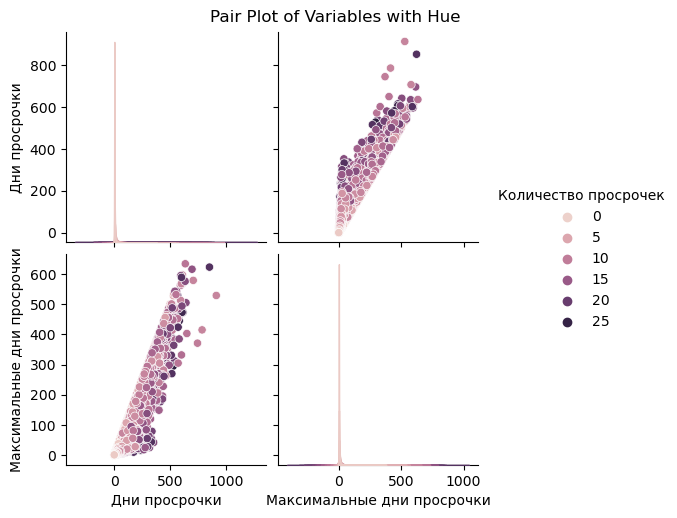

In [580]:
columns_of_interest = ['Дни просрочки', 'Максимальные дни просрочки', 'Количество просрочек']
df_subset = df[columns_of_interest]

# Create a pair plot for the selected columns
sns.pairplot(df_subset, hue=df_subset.columns[2])  # Change the index to the column you want to use as hue
plt.suptitle('Pair Plot of Variables with Hue', y=1.02)
plt.show()

In [581]:
value_counts = dfcopy['Количество просрочек'].value_counts()

In [582]:
value_counts

0     41951
1     14885
2      7478
3      4896
4      3517
5      2738
6      2182
7      1903
8      1544
9      1250
10      957
11      696
12      497
13      241
14      178
15      149
16      126
17       99
18       53
19       25
20       19
21       16
22       13
23        5
24        3
26        1
Name: Количество просрочек, dtype: int64

In [579]:
dfcopy2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85422 entries, 0 to 85421
Data columns (total 26 columns):
 #   Column                                                                                                                                           Non-Null Count  Dtype  
---  ------                                                                                                                                           --------------  -----  
 0   Married                                                                                                                                          85422 non-null  int32  
 1   Gender                                                                                                                                           85422 non-null  int32  
 2   Nationality                                                                                                                                      85422 non-null  int32  
 3   Educ            

# Виден дисбаланс в данных. Много людей у которых 0 просрочек и у кто впервые берет в кредит. Те кто берут в кредит впервые за всю жизнь у нас в данных - гдето 18,5 тысяч

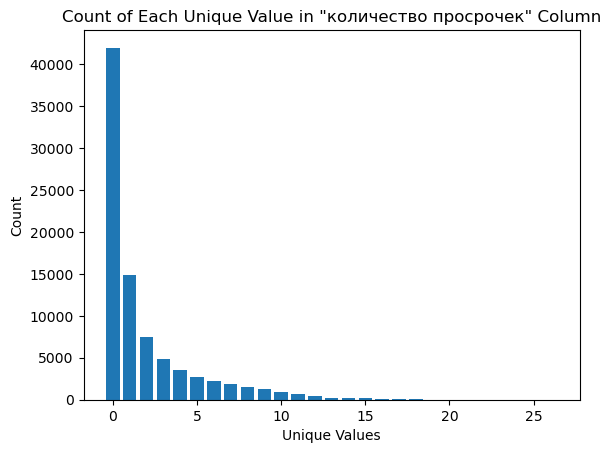

In [583]:

plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.title('Count of Each Unique Value in "количество просрочек" Column')
plt.show()

In [584]:
value_counts = dfcopy['Этап кредитования (который раз получает кредит'].value_counts()
value_counts

1     37715
2     17055
3      9983
4      6334
5      3959
6      2482
7      1683
0      1266
8      1126
9       841
10      660
11      493
12      358
13      258
14      184
15      137
16      113
17      102
18       82
19       80
20       63
21       48
22       45
23       43
24       40
25       29
27       25
29       25
26       24
30       21
28       20
32       19
33       17
31       14
36       14
35       14
34       11
37        8
38        7
39        5
40        4
41        3
53        1
81        1
80        1
71        1
54        1
61        1
72        1
79        1
70        1
51        1
50        1
44        1
Name: Этап кредитования (который раз получает кредит, dtype: int64

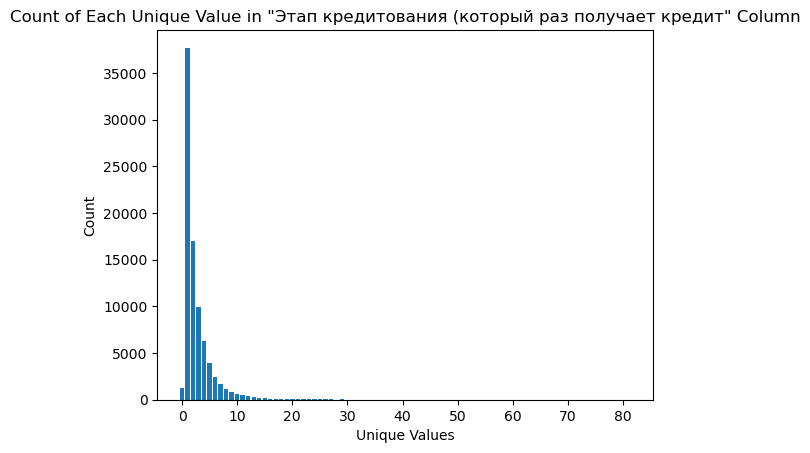

In [585]:
value_counts = dfcopy['Этап кредитования (который раз получает кредит'].value_counts()
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.title('Count of Each Unique Value in "Этап кредитования (который раз получает кредит" Column')
plt.show()

#  Data splitting for Logistic regression.

In [591]:
df['average_delays'] = df['Дни просрочки']/df['Количество просрочек']

In [592]:
import numpy as np

In [593]:
df['average_delays'].replace([np.inf, -np.inf, np.nan], 0, inplace=True)

In [594]:
df['average_delays'].unique()

array([ 3.        ,  0.        ,  2.        , ..., 11.7       ,
        1.72727273, 26.85714286])

In [595]:
df['average_delays'].mean()

2.645601885469349

In [596]:
#df = df.drop('колво_на_дни', axis = 1)

In [597]:
for i in range(0,85422):
    if (df.at[i, 'average_delays'] <=2):
        df.at[i, 'average_delays'] = 1
    if (df.at[i, 'average_delays'] > 2):
        df.at[i, 'average_delays'] = 0


In [598]:
df['average_delays'].unique()

array([0., 1.])

In [599]:
df['Сумма кредита'].describe()

count     85422.000000
mean       3824.493754
std        6429.189996
min           1.840000
25%         600.000000
50%        2200.000000
75%        5000.000000
max      250000.000000
Name: Сумма кредита, dtype: float64

# Вот здесь видно, что в данных 1 больше, чем 0

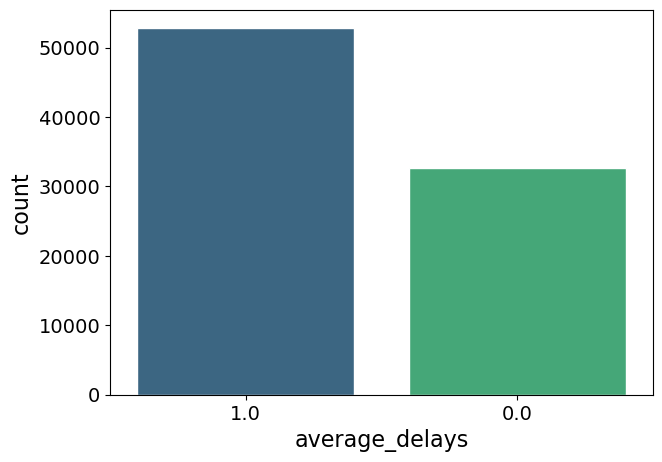

In [600]:
fig, ax = plt.subplots(1, 1, figsize=(7,5), sharex=True)
sns.countplot(data=df, x='average_delays',edgecolor="white",palette="viridis",order=df["average_delays"].value_counts().index)
total = df['average_delays'].value_counts().sum()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('average_delays', fontsize=16)
plt.ylabel('count', fontsize=16)

plt.show()

In [601]:
df.columns

Index(['Married', 'Gender', 'Nationality', 'Educ', 'FamilySize', 'BusExper',
       'Filial',
       'Уровень клиента (Бовари до 1 год, Хамкори от 1 до 3 лет, Шарик от 3 до 5 лет, VIPболее 5 лет)',
       'Навпреление деятельности', 'Продукт', 'Сектор', 'Сумма кредита',
       'Срок кредита', 'Ежемесячная сумма погашения по графику',
       'Льготный период (месяц)',
       'Залог (группа-поручительство, категория 1 - недвижимость, категория 2-движимое имущество, категория 3-поручительство, категория 4 - без залога)',
       'Капитал', 'Актив', 'Обязательства', 'Дни просрочки',
       'Максимальные дни просрочки', 'Количество просрочек',
       'Этап кредитования (который раз получает кредит', 'Валовая прибыль',
       'Чистая прибыль', 'Age', 'average_delays'],
      dtype='object')

In [602]:
df['Продукт'].unique()

array([ 2.,  3.,  1.,  4., nan])

# Predicting missed values (random forest). For цикл чтобы каждый раз предсказывать пустые значения на основе features(другие столбцы). Последняя строчка будет каждый раз добавлять заполненные столбцы в features для следующего предсказания. Попробовала ещё catboost, но разницы особой не было.( Я хочу взять наилучшие результаты и добавить в features чтобы попробовать повторить этот код ещё раз на предсказание с показателями по ниже. Не успела пока)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

# Assuming df is your DataFrame

# Take only the first 1000 rows from the DataFrame
df_subset = df.head(1000)

features = ['Married', 'Gender', 'Nationality', 'Educ', 'Filial', 'Region',
            'Уровень клиента (Бовари до 1 год, Хамкори от 1 до 3 лет, Шарик от 3 до 5 лет, VIPболее 5 лет)',
            'Навпреление деятельности', 'Сектор', 'Сумма кредита',
            'Срок кредита', 'Ежемесячная сумма погашения по графику',
            'Залог (группа-поручительство, категория 1 - недвижимость, категория 2-движимое имущество, категория 3-поручительство, категория 4 - без залога)',
            'average_delays',
            'Этап кредитования (который раз получает кредит']

columns_with_missing_values = ['Обязательства']

best_mae = float('inf')  
best_params = None

for random_state in range(1, 101): 
    for test_size in range(20, 31):  
        test_size = test_size / 100.0  

        for column in columns_with_missing_values:
            train_data = df_subset.dropna(subset=[column])
            predict_data = df_subset[df_subset[column].isnull()]

            X_train, X_test, y_train, y_test = train_test_split(train_data[features],
                                                                train_data[column],
                                                                test_size=test_size,
                                                                random_state=random_state)
            model = RandomForestRegressor()

            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)

            model.fit(X_train_scaled, y_train)

            predictions = model.predict(X_test_scaled)
            mae = mean_absolute_error(y_test, predictions)

            if mae < best_mae:
                best_mae = mae
                best_params = {'random_state': random_state, 'test_size': test_size, 'column': column}

# Print the best parameters
print(f"Best Parameters: {best_params}")
print(f"Best MAE: {best_mae}")
print(f"Best Random State: {best_params['random_state']}")

In [605]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

features = ['Married', 'Gender', 'Nationality', 'Educ',
       'Filial',
       'Уровень клиента (Бовари до 1 год, Хамкори от 1 до 3 лет, Шарик от 3 до 5 лет, VIPболее 5 лет)',
       'Навпреление деятельности', 'Сектор', 'Сумма кредита',
       'Срок кредита', 'Ежемесячная сумма погашения по графику',
       'Залог (группа-поручительство, категория 1 - недвижимость, категория 2-движимое имущество, категория 3-поручительство, категория 4 - без залога)',
       'average_delays',
       'Этап кредитования (который раз получает кредит']


columns_with_missing_values = ['Актив', 'Капитал', 'Обязательства', 'Age', 'FamilySize', 'Льготный период (месяц)', 'Валовая прибыль', 'Чистая прибыль', 'BusExper']


for column in columns_with_missing_values:
    train_data = df.dropna(subset=[column])
    predict_data = df[df[column].isnull()]
    
    X_train, X_test, y_train, y_test = train_test_split(train_data[features], train_data[column], test_size=0.21, random_state=82)
    model = RandomForestRegressor()
    
  
    model.fit(X_train, y_train)

    df.loc[df[column].isnull(), column] = model.predict(predict_data[features])

    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    print(f'MAE for {column}: {mae}')
    
    r2 = r2_score(y_test, predictions)
    print(f'R2 for {column}: {r2}')
    cumulat_column = [column]
    features = features + cumulat_column

MAE for Актив: 7963.647820886352
R2 for Актив: 0.3315109278159203
MAE for Капитал: 1694.3822711283788
R2 for Капитал: 0.9488529387109897
MAE for Обязательства: 402.42975337683345
R2 for Обязательства: 0.3943781499237866
MAE for Age: 8.50426543038469
R2 for Age: 0.1490071899516896
MAE for FamilySize: 1.088135807943041
R2 for FamilySize: 0.14936829307077526
MAE for Льготный период (месяц): 0.29014811872197943
R2 for Льготный период (месяц): 0.93249819364436
MAE for Валовая прибыль: 1472.8945743473325
R2 for Валовая прибыль: 0.17765841286622974
MAE for Чистая прибыль: 815.5913370093793
R2 for Чистая прибыль: 0.8107750505485143
MAE for BusExper: 4.614076984998171
R2 for BusExper: 0.2978432973416899


In [606]:
df['FamilySize'] = np.ceil(df['FamilySize']).astype(int)
df['BusExper'] = np.ceil(df['BusExper']).astype(int)

In [607]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85422 entries, 0 to 85421
Data columns (total 27 columns):
 #   Column                                                                                                                                           Non-Null Count  Dtype  
---  ------                                                                                                                                           --------------  -----  
 0   Married                                                                                                                                          85422 non-null  int32  
 1   Gender                                                                                                                                           85422 non-null  int32  
 2   Nationality                                                                                                                                      85422 non-null  int32  
 3   Educ            

In [608]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

features = ['Married', 'Gender', 'Nationality', 'Educ',
       'Filial',
       'Уровень клиента (Бовари до 1 год, Хамкори от 1 до 3 лет, Шарик от 3 до 5 лет, VIPболее 5 лет)',
       'Сумма кредита',
       'Срок кредита', 'Ежемесячная сумма погашения по графику',
       'Залог (группа-поручительство, категория 1 - недвижимость, категория 2-движимое имущество, категория 3-поручительство, категория 4 - без залога)',
       'average_delays',
       'Этап кредитования (который раз получает кредит', 'Актив', 'Капитал', 'Обязательства', 'Age', 'FamilySize', 'Льготный период (месяц)', 'Валовая прибыль', 'Чистая прибыль', 'BusExper']


columns_with_missing_values = ['Продукт']


for column in columns_with_missing_values:
    train_data = df.dropna(subset=[column])
    predict_data = df[df[column].isnull()]

    X_train, X_test, y_train, y_test = train_test_split(train_data[features], train_data[column], test_size=0.21, random_state=82)
    
    model = RandomForestClassifier()  # Change to RandomForestClassifier
    
    model.fit(X_train, y_train)

    df.loc[df[column].isnull(), column] = model.predict(predict_data[features])

    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f'Accuracy for {column}: {accuracy:.2f}')

    # Additional classification metrics
    report = classification_report(y_test, predictions)
    print(f'Classification Report for {column}:\n{report}')

    cumulat_column = [column]
    features = features + cumulat_column

Accuracy for Продукт: 0.91
Classification Report for Продукт:
              precision    recall  f1-score   support

         1.0       0.89      0.59      0.71       719
         2.0       0.94      0.98      0.96     11525
         3.0       0.87      0.90      0.88      4998
         4.0       0.70      0.32      0.43       679

    accuracy                           0.91     17921
   macro avg       0.85      0.70      0.75     17921
weighted avg       0.91      0.91      0.91     17921



In [609]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85422 entries, 0 to 85421
Data columns (total 27 columns):
 #   Column                                                                                                                                           Non-Null Count  Dtype  
---  ------                                                                                                                                           --------------  -----  
 0   Married                                                                                                                                          85422 non-null  int32  
 1   Gender                                                                                                                                           85422 non-null  int32  
 2   Nationality                                                                                                                                      85422 non-null  int32  
 3   Educ            

In [125]:
#df['Продукт'] = np.ceil(df['Продукт']).astype(int)

In [126]:
#df['Льготный период (месяц)'] = np.ceil(df['Льготный период (месяц)']).astype(int)

# В данных очень много тех кто впервые вообще берет кредит - неизвесно будет ли у них длительная просрочка по оплате или нет. При обучении модели они считаются как одобренный кредит. Возникает дисбаланс в тренировочных данных для модели. В стримлите ввожу смешные параметры, но модель все равно одобряет кредит(accuracy 0.78). Я сейчас предскажу просрочку для тех кто впервые берёт в кредит чтобы убрать дисбаланс. Этот дисбаланс решить не успела так как позднее заметила

# df.to_excel('df1arvand.xlsx', index=False)

# pr_disb = pd.read_excel("to_predict_arvand.xlsx")

# traindisb= pd.read_excel("to_train_arvand.xlsx")

# pr_disb['Этап кредитования (который раз получает кредит'] = pr_disb['Этап кредитования (который раз получает кредит'].replace(0, 1)

# pr_disb['Количество просрочек'] = pr_disb['Количество просрочек'].replace(0, np.nan)

# import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

X = traindisb.drop('Дни просрочки', axis=1)
X = traindisb.drop( 'Максимальные дни просрочки', axis=1)
X = traindisb.drop( 'Количество просрочек', axis=1)
y = traindisb['Количество просрочек']
 
    # Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train the RandomForestRegressor model
model = RandomForestRegressor()
model.fit(X_train, y_train)

    # Impute missing values in the original DataFrame
pr_disb.loc[pr_disb['Количество просрочек'].isnull(), 'Количество просрочек'] = model.predict(pr_disb)

    # Evaluate the model performance
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'MAE for {column}: {mae:.2f}')
print(f'R2 for {column}: {r2:.2f}')

    # Optional: If you want to see feature importances
feature_importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
print(f'Feature Importances:\n{feature_importances}\n')


In [129]:
X = df.drop(columns = ['Дни просрочки', 'Максимальные дни просрочки', 'Количество просрочек', 'average_delays','Region'] )

In [130]:
X.columns


Index(['Married', 'Gender', 'Nationality', 'Educ', 'FamilySize', 'BusExper',
       'Filial',
       'Уровень клиента (Бовари до 1 год, Хамкори от 1 до 3 лет, Шарик от 3 до 5 лет, VIPболее 5 лет)',
       'Навпреление деятельности', 'Продукт', 'Сектор', 'Сумма кредита',
       'Срок кредита', 'Ежемесячная сумма погашения по графику',
       'Льготный период (месяц)',
       'Залог (группа-поручительство, категория 1 - недвижимость, категория 2-движимое имущество, категория 3-поручительство, категория 4 - без залога)',
       'Капитал', 'Актив', 'Обязательства',
       'Этап кредитования (который раз получает кредит', 'Валовая прибыль',
       'Чистая прибыль', 'Age'],
      dtype='object')

In [131]:
y = df['average_delays']

In [132]:
df['Age'] = np.ceil(df['Age']).astype(int)

In [133]:
df['Age'].unique()

array([ 25,  51,  45,  41,  37,  42,  55,  57,  35,  39,  33,  43,  56,
        27,  34,  50,  49,  44,  46,  60,  30,  52,  28,  32,  22,  47,
        31,  26,  53,  38,  40,  48,  36,  24,  61,  20,  21,  23,  29,
        65,  58,  54,  59,  64,  68,  67,  62,  76,  66,  69,  19,  63,
        72,  70,  18,  73,  71,  74,  15, 336, 337,  16,  81,  90,  82,
        75,  17, 225, -35])

In [134]:
X.columns

Index(['Married', 'Gender', 'Nationality', 'Educ', 'FamilySize', 'BusExper',
       'Filial',
       'Уровень клиента (Бовари до 1 год, Хамкори от 1 до 3 лет, Шарик от 3 до 5 лет, VIPболее 5 лет)',
       'Навпреление деятельности', 'Продукт', 'Сектор', 'Сумма кредита',
       'Срок кредита', 'Ежемесячная сумма погашения по графику',
       'Льготный период (месяц)',
       'Залог (группа-поручительство, категория 1 - недвижимость, категория 2-движимое имущество, категория 3-поручительство, категория 4 - без залога)',
       'Капитал', 'Актив', 'Обязательства',
       'Этап кредитования (который раз получает кредит', 'Валовая прибыль',
       'Чистая прибыль', 'Age'],
      dtype='object')

In [135]:
df['Залог (группа-поручительство, категория 1 - недвижимость, категория 2-движимое имущество, категория 3-поручительство, категория 4 - без залога)']

0        4
1        3
2        0
3        0
4        1
        ..
85417    2
85418    2
85419    2
85420    2
85421    2
Name: Залог (группа-поручительство, категория 1 - недвижимость, категория 2-движимое имущество, категория 3-поручительство, категория 4 - без залога), Length: 85422, dtype: int32

Text(0.5, 1.0, 'correlation')

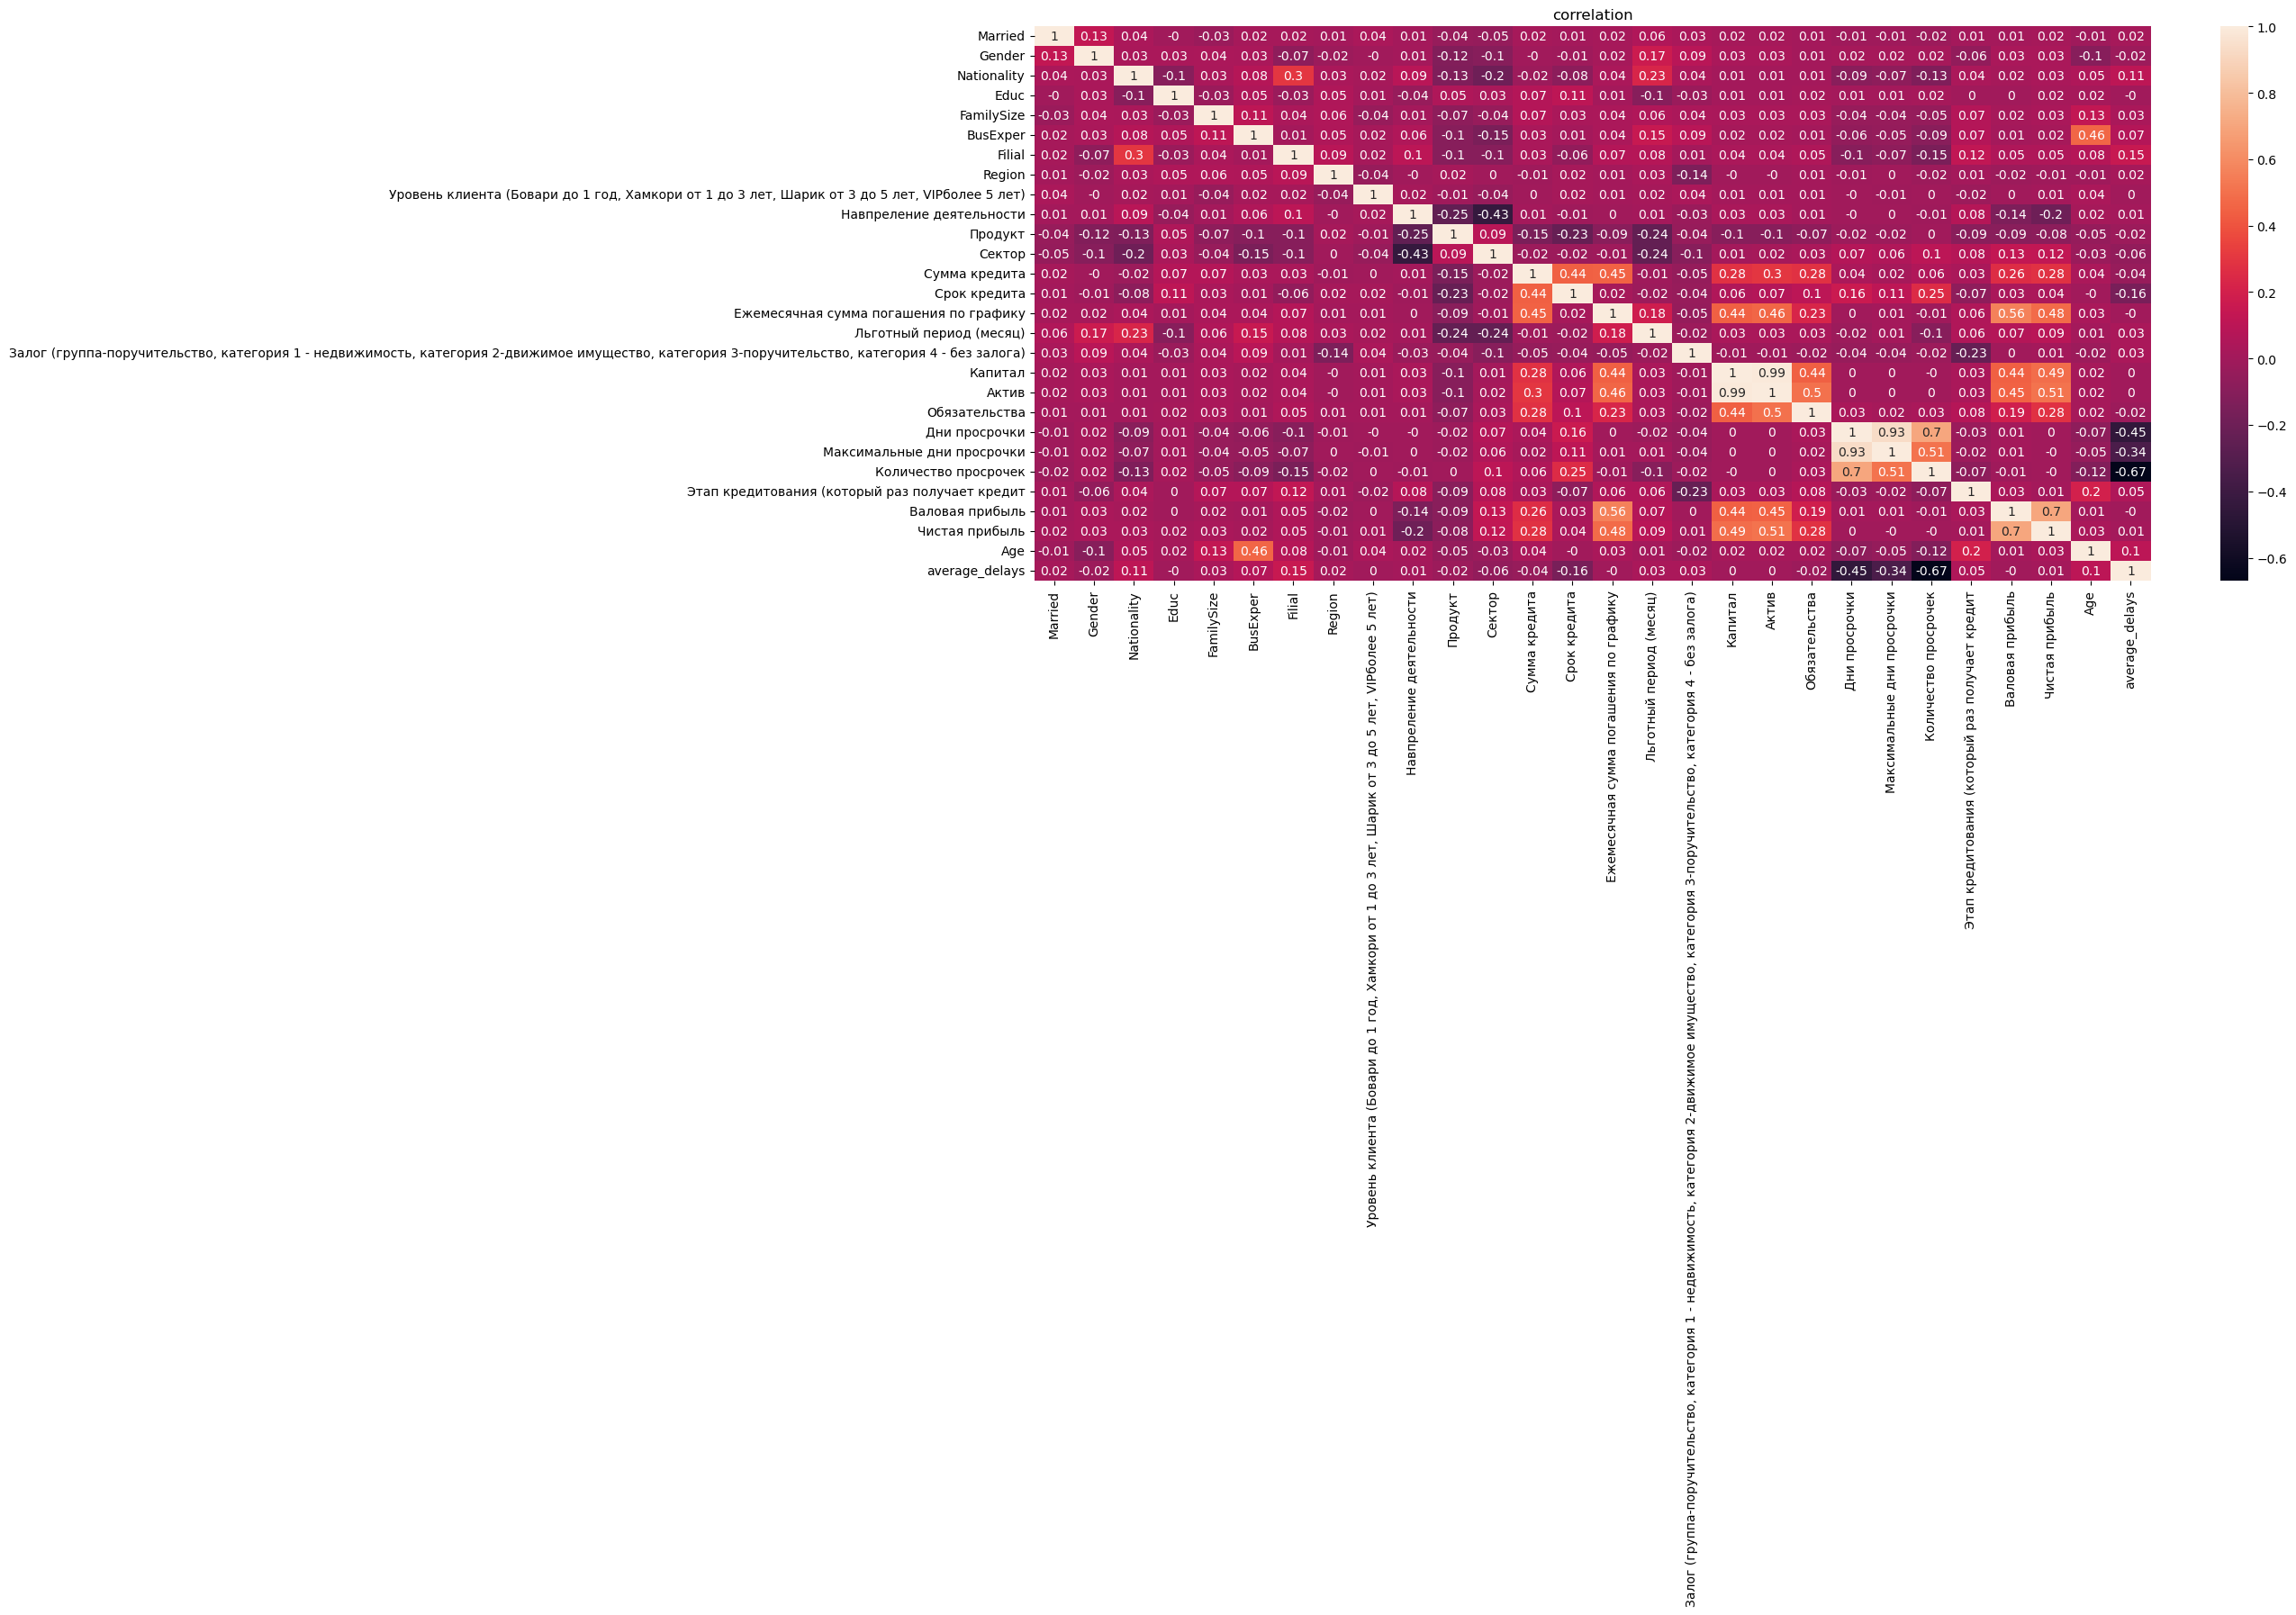

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(20,8))
plot = sns.heatmap(df.corr().round(2), annot = True)
plot.set_title('correlation')

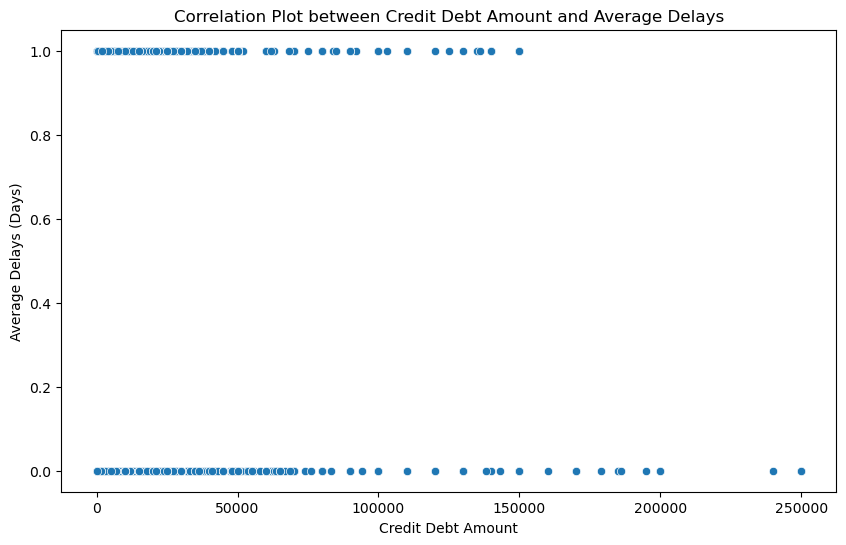

In [619]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Сумма кредита', y='average_delays', data=df)

# Add labels and title
plt.xlabel('Credit Debt Amount')
plt.ylabel('Average Delays (Days)')
plt.title('Correlation Plot between Credit Debt Amount and Average Delays')

# Show the plot
plt.show()

In [200]:
df.columns

Index(['Married', 'Gender', 'Nationality', 'Educ', 'FamilySize', 'BusExper',
       'Filial', 'Region',
       'Уровень клиента (Бовари до 1 год, Хамкори от 1 до 3 лет, Шарик от 3 до 5 лет, VIPболее 5 лет)',
       'Навпреление деятельности', 'Продукт', 'Сектор', 'Сумма кредита',
       'Срок кредита', 'Ежемесячная сумма погашения по графику',
       'Льготный период (месяц)',
       'Залог (группа-поручительство, категория 1 - недвижимость, категория 2-движимое имущество, категория 3-поручительство, категория 4 - без залога)',
       'Капитал', 'Актив', 'Обязательства', 'Дни просрочки',
       'Максимальные дни просрочки', 'Количество просрочек',
       'Этап кредитования (который раз получает кредит', 'Валовая прибыль',
       'Чистая прибыль', 'Age'],
      dtype='object')

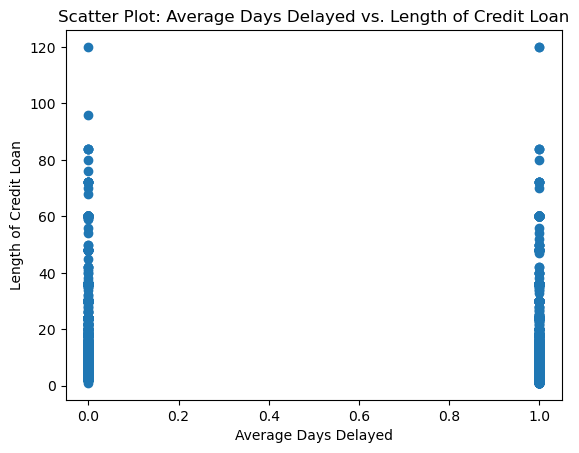

In [137]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with columns 'Average Days Delayed' and 'Length of Credit Loan'
plt.scatter(df['average_delays'], df[ 'Срок кредита'])
plt.xlabel('Average Days Delayed')
plt.ylabel('Length of Credit Loan')
plt.title('Scatter Plot: Average Days Delayed vs. Length of Credit Loan')
plt.show()


C:\Users\Farzona\anaconda3\Lib\site-packages\seaborn\axisgrid.py:181: UserWarning: The label '_nolegend_' of <matplotlib.patches.Patch object at 0x0000020414D75290> starts with '_'. It is thus excluded from the legend.
  figlegend = self._figure.legend(handles, labels, **kwargs)


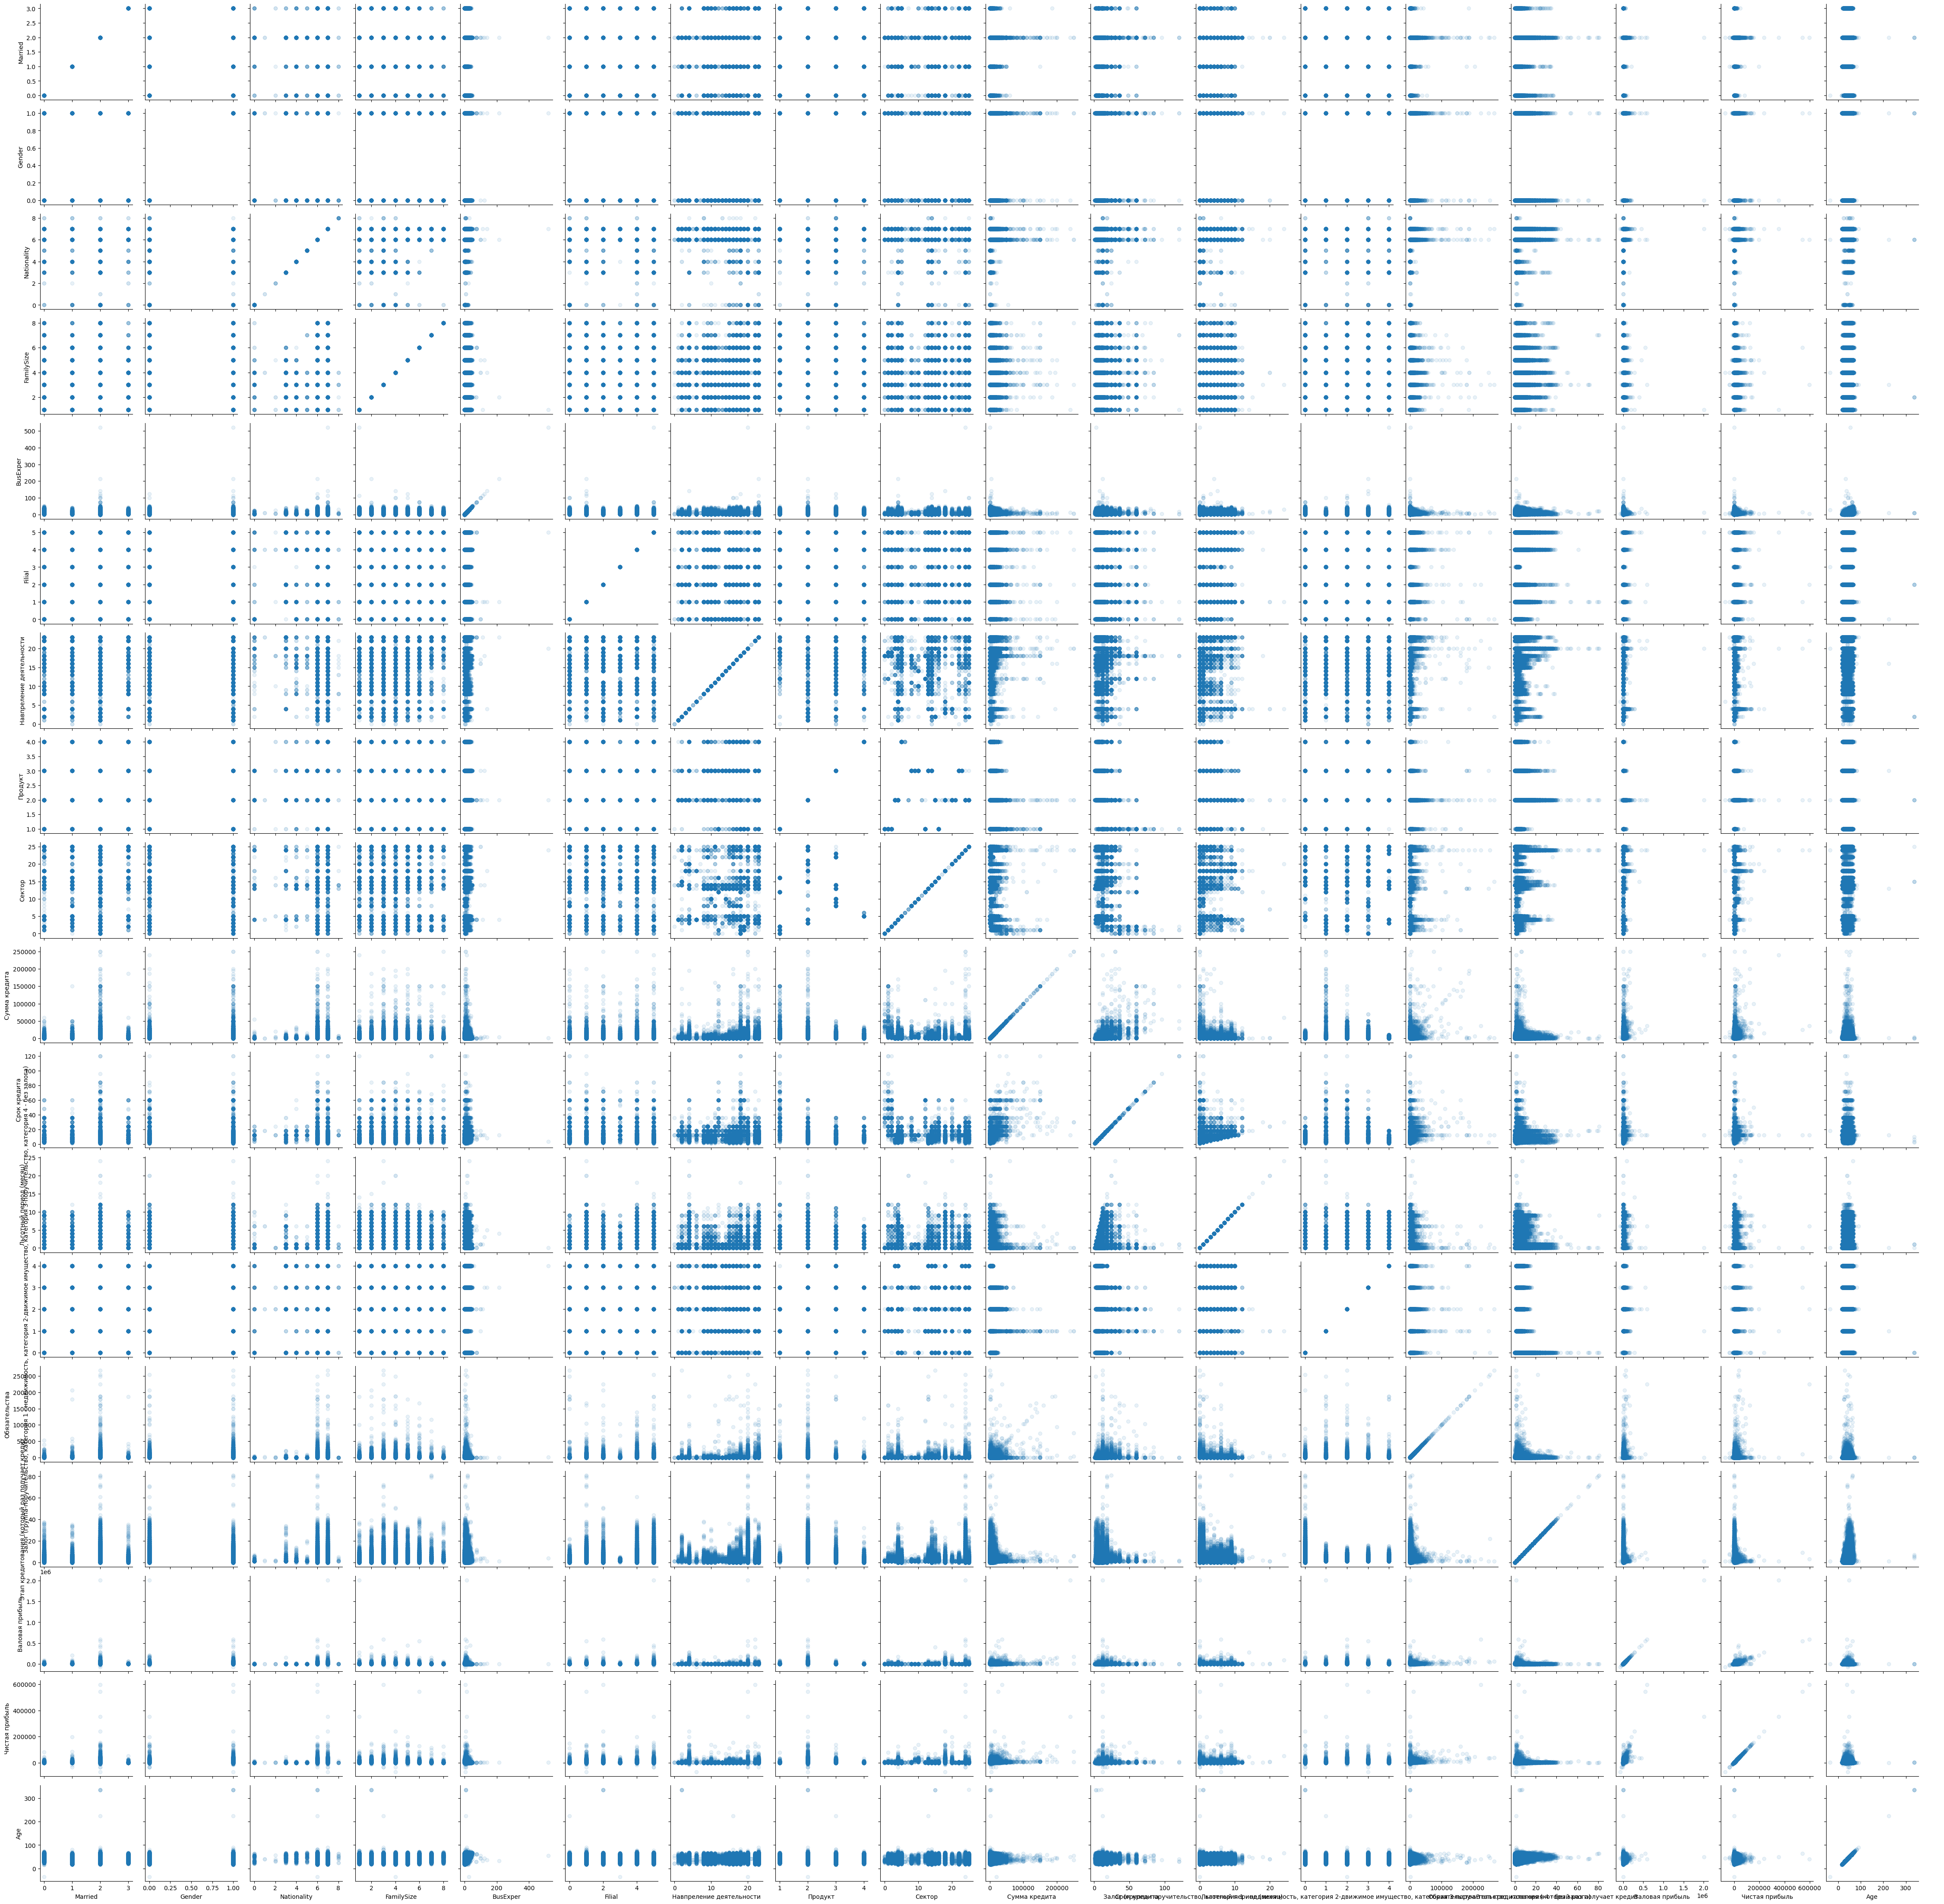

In [138]:
matrix=sns.PairGrid(df, vars=['Married', 'Gender', 'Nationality', 'FamilySize', 'BusExper',
       'Filial',
       'Навпреление деятельности', 'Продукт', 'Сектор', 'Сумма кредита',
       'Срок кредита',
       'Льготный период (месяц)',
       'Залог (группа-поручительство, категория 1 - недвижимость, категория 2-движимое имущество, категория 3-поручительство, категория 4 - без залога)',
       'Обязательства',
       'Этап кредитования (который раз получает кредит', 'Валовая прибыль',
       'Чистая прибыль', 'Age'])
matrix.map(plt.scatter, alpha=0.1)
matrix.add_legend()

# Train test split and Classification task

In [620]:
from sklearn.model_selection import train_test_split

In [621]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 21)

In [622]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Create and train a logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

joblib.dump(logistic_model, 'logistic_model.pkl')

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.36
Classification Report:
               precision    recall  f1-score   support

           1       0.37      0.99      0.54      2522
           2       0.33      0.00      0.01      1189
           3       0.27      0.00      0.01       746
           4       0.00      0.00      0.00       514
           5       0.00      0.00      0.00       404
           6       0.00      0.00      0.00       331
           7       0.33      0.00      0.01       271
           8       0.00      0.00      0.00       239
           9       0.08      0.01      0.01       176
          10       0.00      0.00      0.00       137
          11       0.00      0.00      0.00        98
          12       0.06      0.03      0.04        77
          13       0.00      0.00      0.00        39
          14       0.00      0.00      0.00        30
          15       0.00      0.00      0.00        28
          16       0.00      0.00      0.00        20
          17       0.00      0.00      0.0

C:\Users\Farzona\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Farzona\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Farzona\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.

In [625]:
import numpy as np

# Assuming y_pred is your predicted results
unique_values = np.unique(y_pred)

print("Unique Values in y_pred:", unique_values)


Unique Values in y_pred: [ 1  2  3  4  5  6  7  9 10 11 12 13 15 17]


# Streamlit App( это код на стримлит, но запускала это из другого файла. Когда заполняла этот код заметила что некоторые категории-значения в столбцах одинаковы(например в столбце залог две одинаковые категории и так же с парочкой других столбцов) Поменять не успела так как уже времени нет. Решила оставить) Плюс в стримлите не важно какие данные бы не вводила, модель выводит 1 - то есть одобряет. Хотя с моделью вроде все норм. Решила оставить так как времени уже нет - нужно сдавать работу.

In [ ]:
import streamlit as st
import joblib
import pandas as pd 
import numpy as np  

# Load the trained model
logistic_model = joblib.load('C:\\Users\\Farzona\\anaconda3\\logistic_model.pkl')


def predict_credit_card_approval(features):
    
   
    prediction = logistic_model.predict(features)
    probability = logistic_model.predict_proba(features)
    
    return prediction, probability

st.title("Credit Card Approval Prediction")

st.text("Ответьте на вопросы пожалуйста:")


number_interpretations = {
    0: "Бевамард (бевазан)",
    1: "Беоила",
    2: "Чудошуда",
    3: "Оиладор"
}

marital_state = st.selectbox(
    "Выберите ваш статус:",
    options=[f"{number} - {number_interpretations[number]}" for number in [0, 1, 2, 3]],
    index=0
)

marital_state = int(marital_state.split('-')[0].strip())


interpretation = number_interpretations[marital_state]


number_interpretations = {
    0: "Женский",
    1: "Мужской"
}

Gender = st.selectbox(
    "Выберите ваш пол:",
    options=[f"{number} - {number_interpretations[number]}" for number in [0, 1]],
    index=0
)

Gender = int(Gender.split('-')[0].strip())


interpretation = number_interpretations[Gender]



#Nationality = 'Точик': 6, 'Узбек': 7, 'Киргиз': 3, 'Рус': 4, 'Тотор': 5, 'Другие': 0, 'Украин': 8, 'Карис': 2, 'Карачои': 1}
number_interpretations = {
    0: "Другие",
    1: "Карачои",
    2: "Карис",
    3: "Киргиз",
    4: "Рус",
    5: "Тотор",
    6: "Точик",
    7: "Узбек",
    8: "Украин"
}

Nationality = st.selectbox(
    "Выберите национальность:",
    options=[f"{number} - {number_interpretations[number]}" for number in [0, 1, 2, 3, 4, 5, 6, 7, 8]],
    index=0
)

Nationality = int(Nationality.split('-')[0].strip())


interpretation = number_interpretations[Nationality]


#Highest edication level = 'Миёна': 1, 'Миёнаи махсус': 2, 'Оли': 4, 'Олии нопурра': 5, 'Миёнаи нопурра': 3, 'Аспирантура': 0
#Edulevel = st.slider("Выберите наивысший уровень образования:", min_value=0, max_value=5, step = 1)
number_interpretations = {
    0: "Аспирантура",
    1: "Миёна",
    2: "Миёнаи махсус",
    3: "Миёнаи нопурра",
    4: "Оли",
    5: "Олии нопурра",
}

Edulevel = st.selectbox(
    "Выберите наивысший уровень образования:",
    options=[f"{number} - {number_interpretations[number]}" for number in [0, 1, 2, 3, 4, 5]],
    index=0
)

# Extract the selected number from the string
Edulevel = int(Edulevel.split('-')[0].strip())


interpretation = number_interpretations[Edulevel]
                       
#Filial = {'Хучанд': 4, 'Исфара': 2, 'Истаравшан': 1, 'Душанбе': 0, 'Ч. Расулов': 5, 'Панчакент': 3}
#filial = st.slider("Выберите филиал:", min_value=0, max_value=5, step = 1)
number_interpretations = {
    0: "Душанбе",
    1: "Истаравшан",
    2: "Исфара",
    3: "Панчакент",
    4: "Хучанд",
    5: "Ч. Расулов",
}

filial = st.selectbox(
    "Выберите филиал:",
    options=[f"{number} - {number_interpretations[number]}" for number in [0, 1, 2, 3, 4, 5]],
    index=0
)

filial = int(filial.split('-')[0].strip())


interpretation = number_interpretations[filial]



#Region = {'Ашт': 1, 'Кистакуз': 19, 'Худжанд-Панчшанбе': 48, 'Худжанд-Центр': 49, 'Ифтихор': 16, 'Оббурдон': 31, 'Бустон': 2, 'Мархамат': 23, 'Сомгор': 41, 'Шарк': 51, 'Дусти': 10, 'Пунук': 35, 'Уяс': 44, 'Оппон': 33, 'Конибодом': 20, 'Кулканд': 21, 'Ниёзбек': 29, 'Исфара': 15, 'Каракчикум': 18, 'Ворух': 4, 'Мехнатобод': 24, 'Ободи': 32, 'Калининобод': 17, 'Шахристон': 52, 'Зафаробод': 12, 'Чашмасор': 50, 'Истаравшан': 13, 'Х.Алиев': 46, 'Равшан': 36, 'Истаравшан-филиал': 14, 'Гончи': 5, 'Нофароч': 30, 'Ничони': 28, 'Навкент': 26, 'Некфайз': 27, 'Гули сурх': 6, 'Мучун': 25, 'Душанбе': 11, 'Турсунзода': 43, 'Вахдат': 3, 'Хисор': 47, 'Сино': 40, 'Рогун': 37, 'Файзобод': 45, 'Рудаки': 38, 'Спитамен': 42, 'Дж.Расулов': 9, 'Гулякандоз': 7, 'Куруш': 22, 'Панчакент': 34, 'Ёри': 0, 'Саразм': 39, 'Гусар': 8}
#Region = st.slider("Выберите ваш регион:", min_value=0, max_value=52, step = 1)

#Сколько вы работаете с Арванд = {'Бовари': 1, 'VIP': 0, 'Хамкори': 2, 'Шарик': 3}
#Authenlevel = st.slider("Сколько лет вы с Арванд:", min_value=0, max_value=3, step = 1)
number_interpretations = {
    0: "более 5-ти лет",
    1: "до 1-го года",
    2: "от 1-го до 3-ех лет",
    3: "от 3-ех до 5-ти"
}

Authenlevel = st.selectbox(
    "Сколько лет вы с Арванд:",
    options=[f"{number} - {number_interpretations[number]}" for number in [0, 1, 2, 3]],
    index=0
)

Authenlevel = int(Authenlevel.split('-')[0].strip())


interpretation = number_interpretations[Authenlevel]

#Направление деятельности = {'Чорводори ва коркарди шир': 23, 'Приобретение техники': 16, 'Савдо': 20, 'Приобретение мебели': 15, 'Ремонт дома': 18, 'Хидматрасони': 22, 'Оплата на лечение': 8, 'Кишту кор': 4, 'Истехсолот': 2, 'Проведение мероприятий': 17, 'Оплата поездок': 10, 'Переоборудование транспорта': 11, 'Покупка квартиры': 12, 'Коркарди шир': 6, 'Оплата образования': 9, 'Ремонт места деятельности': 19, 'Все': 0, 'Потребнужды': 14, 'Кишоварзи': 3, 'Животноводство': 1, 'Мевахушккуни': 7, 'Коммерческий': 5, 'Потреб.другое': 13, 'Сушка фрутов': 21}
#goal = st.slider("Направление вашей деятельности:", min_value=0, max_value=23, step = 1)
number_interpretations = {
    0: "Все",
    1: "Животноводство",
    2: "Истехсолот",
    3: "Кишоварзи",
    4: "Кишту кор",
    5: "Коммерческий",
    6: "Коркарди шир",
    7: "Мевахушккуни",
    8: "Оплата на лечение",
    9: "Оплата образования",
    10: "Оплата поездок",
    11: "Переоборудование транспорта",
    12: "Покупка квартиры",
    13: "Потреб.другое",
    14: "Потребнужды",
    15: "Приобретение мебели",
    16: "Приобретение техники",
    17: "Проведение мероприятий",
    18: "Ремонт дома",
    19: "Ремонт места деятельности",
    20: "Савдо",
    21: "Сушка фрутов",
    22: "Хидматрасони",
    23: "Чорводори ва коркарди шир"
}

goal = st.selectbox(
    "Направление вашей деятельности:",
    options=[f"{number} - {number_interpretations[number]}" for number in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]],
    index=0
)

# Extract the selected number from the string
goal = int(goal.split('-')[0].strip())


# Display the interpretation of the selected number
interpretation = number_interpretations[goal]

#Сектор = {'Животноводство': 4, 'Потребнужды': 14, 'Торговля': 24, 'Услуги': 25, 'Производство': 15, 'Сельхозкультура (ТАФФ)': 18, 'Потреб Экспресс': 13, 'Бизнес Экспресс': 3, ' Жилье для сотрудников': 0, 'Зеленый кредит - Печки': 5, 'Корманд-кредит': 8, 'Сельхозтехника (ТАФФ)': 20, 'Мигрант': 9, 'Покупка и строит-во жилья': 12, 'Ремонт жилья': 16, 'Комьёби': 7, 'Мигрант-Потреб 2': 10, 'Тахсил': 22, 'Старт-бизнес': 21, 'KFW - Покупка и строит-во жилья': 1, 'KFW - Ремонт жилья': 2, 'Зеленый кредит - Солнечные батареи': 6, 'Мигрант-бизнес 2': 11, 'Товары в кредит': 23, 'Сельхозкультура-кредитная линия': 19, 'Сельхозкультура (Сароб)': 17}
#sector = st.slider("Сектор:", min_value=0, max_value=25, step = 1)
number_interpretations = {
    0: "Жилье для сотрудников",
    1: "KFW - Покупка и строит-во жилья",
    2: "KFW - Ремонт жилья",
    3: "Бизнес Экспресс",
    4: "Животноводство",
    5: "Зеленый кредит - Печки",
    6: "Зеленый кредит - Солнечные батареи",
    7: "Комьёби",
    8: "Корманд-кредит",
    9: "Мигрант",
    10: "Мигрант-Потреб 2",
    11: "Мигрант-бизнес 2",
    12: "Покупка и строит-во жилья",
    13: "Потреб Экспресс",
    14: "Потребнужды",
    15: "Производство",
    16: "Ремонт жилья",
    17: "Сельхозкультура (Сароб)",
    18: "Сельхозкультура (ТАФФ)",
    19: "Сельхозкультура-кредитная линия",
    20: "Сельхозтехника (ТАФФ)",
    21: "Старт-бизнес",
    22: "Тахсил",
    23: "Товары в кредит",
    24: "Торговля",
    25: "Услуги"
}

# Add a choice dropdown for a labeled number with interpretations displayed
sector = st.selectbox(
    "Сектор:",
    options=[f"{number} - {number_interpretations[number]}" for number in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]],
    index=0
)

# Extract the selected number from the string
sector = int(sector.split('-')[0].strip())


# Display the interpretation of the selected number
interpretation = number_interpretations[sector]

credit_amount = user_input = st.number_input("Сумма кредите(сумма в TJS):")
credit_term = st.number_input("Срок кредита в месяцах:", step=1)
month_pay = st.number_input("Ежемесячная сумма оплаты(сумма в TJS):", step=1)
asset = st.number_input("Ваш капитал(сумма в TJS):")
asset2 = st.number_input("Ваши активы(сумма в TJS):")
#Продукт = {'unknown': 0, 'Жилищный кредит': 1, 'Кредит на предпринимательскую деятельность': 2, 'Потребительский кредит': 3, 'Энергосберегающие технологии': 4}
#product = st.slider("Для чего вам кредит:", min_value=0, max_value=4, step = 1)
number_interpretations = {
    0: "unknown",
    1: "Жилищный кредит",
    2: "Кредит на предпринимательскую деятельность",
    3: "Потребительский кредит",
    4: "Энергосберегающие технологии"
}

# Add a choice dropdown for a labeled number with interpretations displayed
product = st.selectbox(
    "Для чего вам кредит:",
    options=[f"{number} - {number_interpretations[number]}" for number in [0, 1, 2, 3, 4]],
    index=0
)

# Extract the selected number from the string
product = int(product.split('-')[0].strip())


# Display the interpretation of the selected number
interpretation = number_interpretations[product]

number_interpretations = {
    0: "поручительство",
    1: "недвижимость",
    2: "движимое имущество",
    3: "поручительство",
    4: "без залога"
}

# Add a choice dropdown for a labeled number with interpretations displayed
pledge = st.selectbox(
    "залог:",
    options=[f"{number} - {number_interpretations[number]}" for number in [0, 1, 2, 3, 4]],
    index=0
)

# Extract the selected number from the string
pledge = int(pledge.split('-')[0].strip())


interpretation = number_interpretations[pledge]
                       
        
money = st.number_input("Обязательства(сумма в TJS):")
Age = st.number_input("Возраст:", step=1)
Family_size = st.number_input("Количество людей в семье:", step=1)
grace_period =  st.number_input("Льготный период:", min_value = 1, max_value = 15, step=1)
gross = st.number_input("Валовая прибыль(сумма в TJS):")
net = st.number_input("Чистая прибыль(сумма в TJS):")
Business_experience = st.number_input("Сколько лет опыта в бизнесе:", step=1)
times = st.number_input("Который раз получаете кредит:", step=1)
   


input_data = pd.DataFrame({
   'Married': [marital_state],
    'Gender': [Gender],
    'Nationality': [Nationality],
    'Educ': [Edulevel],
    'FamilySize': [Family_size],
    'BusExper': [Business_experience],
    'Filial': [filial],
    'Уровень клиента (Бовари до 1 год, Хамкори от 1 до 3 лет, Шарик от 3 до 5 лет, VIPболее 5 лет)': [Authenlevel],
    'Навпреление деятельности': [goal],
    'Продукт': [product],
    'Сектор': [sector],
    'Сумма кредита': [credit_amount],
    'Срок кредита': [credit_term],
    'Ежемесячная сумма погашения по графику': [month_pay],
    'Льготный период (месяц)': [grace_period],
    'Залог (группа-поручительство, категория 1 - недвижимость, категория 2-движимое имущество, категория 3-поручительство, категория 4 - без залога)': [pledge],
    'Капитал': [asset],
    'Актив': [asset2],
    'Обязательства': [money],
    'Этап кредитования (который раз получает кредит': [times],
    'Валовая прибыль': [gross],
    'Чистая прибыль': [net],
    'Age': [Age]
})

# Make prediction on button click
if st.button("Predict Credit Card Approval"):

    
    prediction_result, probability = predict_credit_card_approval(input_data)
    
    st.write(f"Prediction: {prediction_result}")
    probability_percentage = float(probability[0][1]) * 100  # Convert to float before formatting
    st.write(f"Probability of Approval: {probability_percentage:.2f}%")


    # Display the prediction result
    if  (prediction_result == 1):
        st.success("Поздравляем! Вероятно, вам одобрят кредитную карту.")
    else:     
        st.error("К сожалению, ваша заявка на кредитную карту, скорее всего, будет отклонена.")